<h1><center><b> DA&V (LAB_3), Data Wrangling </b></center></h1>

***INSTRUCTIONS*** <br>
You all are required to perform data wrangling and do all tasks, Every question has some sub-questions and all of them have designated code cell, Read the question carefully and write the code according to the number of question, Add comment in code section before writing code.

The dataset/s required for the lab download from Kaggle, use them according to the task.

<br>
<h1><center>GOOD LUCK, Happy Labbing :D </center></h1>

### **1. Load the dataset**



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

df=pd.read_csv("store.csv")
df1=pd.read_csv("train.csv")


### **2. Merge both datasets into 1 dataset.**
*2.1. Show first and last 5 rows of the dataset.* <br>
*2.2. Show description of the dataset.*

In [4]:
train_store=pd.merge(df,df1)
train_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1.0,0,1.0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1.0,0,1.0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1.0,0,1.0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1.0,0,1.0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140321,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2015-04-02,11033,705,1,1.0,0,1.0
140322,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2015-04-01,10547,598,1,1.0,0,1.0
140323,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,2015-03-31,9053,557,1,1.0,0,1.0
140324,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2015-03-30,11641,661,1,1.0,0,1.0


### **3. Dealing with Missing values**

1.   Check for the missing values
2.   Count the missing values


In [5]:
train_store.info()   #for null columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140326 entries, 0 to 140325
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      140326 non-null  int64  
 1   StoreType                  140326 non-null  object 
 2   Assortment                 140326 non-null  object 
 3   CompetitionDistance        139948 non-null  float64
 4   CompetitionOpenSinceMonth  95775 non-null   float64
 5   CompetitionOpenSinceYear   95775 non-null   float64
 6   Promo2                     140326 non-null  int64  
 7   Promo2SinceWeek            71852 non-null   float64
 8   Promo2SinceYear            71852 non-null   float64
 9   PromoInterval              71852 non-null   object 
 10  DayOfWeek                  140326 non-null  int64  
 11  Date                       140326 non-null  object 
 12  Sales                      140326 non-null  int64  
 13  Customers                  14

In [6]:
train_store.isnull().sum()

Store                            0
StoreType                        0
Assortment                       0
CompetitionDistance            378
CompetitionOpenSinceMonth    44551
CompetitionOpenSinceYear     44551
Promo2                           0
Promo2SinceWeek              68474
Promo2SinceYear              68474
PromoInterval                68474
DayOfWeek                        0
Date                             0
Sales                            0
Customers                        0
Open                             0
Promo                            1
StateHoliday                     1
SchoolHoliday                    1
dtype: int64

### **4. Handle missing values (if any)**
*4.1. Handle by mean or mode* <br>
*4.2. Remove useless column* <br>
*4.3. Check datatypes of the columns*

In [7]:
len(train_store.columns)

18

<Axes: title={'center': 'Missing values in percentage'}, ylabel='percentage'>

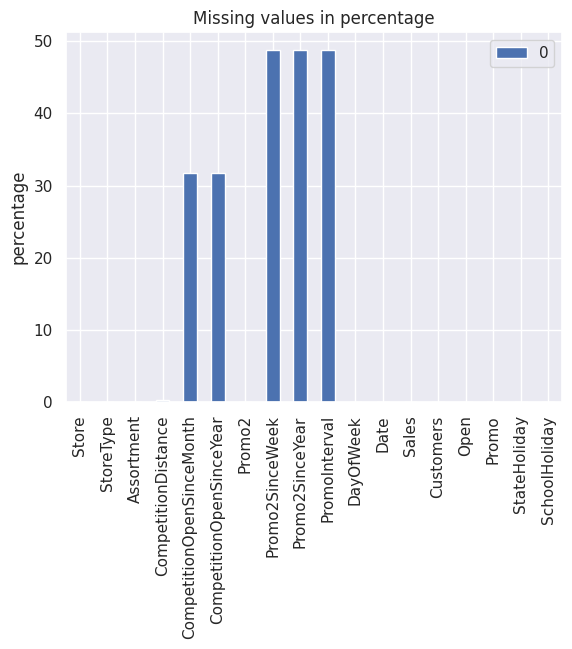

In [8]:
import seaborn as sns
sns.set()
miss_vals = pd.DataFrame(train_store.isnull().sum() / len(train_store) * 100)
miss_vals.plot(kind='bar',title='Missing values in percentage',ylabel='percentage')

In [9]:
print(f'Size of the dataset: {train_store.shape}')
train_store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval'], axis=1, inplace=True)
train_store.dropna(inplace=True)
print(f'Size of the dataset after dropping: {train_store.shape}')

Size of the dataset: (140326, 18)
Size of the dataset after dropping: (139947, 13)


In [10]:
train_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2',
       'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

### **5. Encode categorical features**



1.   Label Encoding
2.   OneHot Encoding
3.   Target Encoding
4.   Binary Transformation


In [11]:
# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_cols = one_hot_encoder.fit_transform(train_store[['StoreType', 'Assortment']])
column_names = one_hot_encoder.get_feature_names_out(['StoreType', 'Assortment'])
encoded_df = pd.DataFrame(encoded_cols, columns=column_names)
print(encoded_df)


        StoreType_a  StoreType_b  StoreType_c  StoreType_d  Assortment_a  \
0               0.0          0.0          1.0          0.0           1.0   
1               0.0          0.0          1.0          0.0           1.0   
2               0.0          0.0          1.0          0.0           1.0   
3               0.0          0.0          1.0          0.0           1.0   
4               0.0          0.0          1.0          0.0           1.0   
...             ...          ...          ...          ...           ...   
139942          0.0          0.0          0.0          1.0           0.0   
139943          0.0          0.0          0.0          1.0           0.0   
139944          0.0          0.0          0.0          1.0           0.0   
139945          0.0          0.0          0.0          1.0           0.0   
139946          0.0          0.0          0.0          1.0           0.0   

        Assortment_b  Assortment_c  
0                0.0           0.0  
1            

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
# Label Encoding
label_encoder = LabelEncoder()

for col in ['StoreType', 'Assortment']:
    train_store[col] = label_encoder.fit_transform(train_store[col])

print(train_store)

        Store  StoreType  Assortment  CompetitionDistance  Promo2  DayOfWeek  \
0           1          2           0               1270.0       0          5   
1           1          2           0               1270.0       0          4   
2           1          2           0               1270.0       0          3   
3           1          2           0               1270.0       0          2   
4           1          2           0               1270.0       0          1   
...       ...        ...         ...                  ...     ...        ...   
140321   1115          3           2               5350.0       1          4   
140322   1115          3           2               5350.0       1          3   
140323   1115          3           2               5350.0       1          2   
140324   1115          3           2               5350.0       1          1   
140325   1115          3           2               5350.0       1          7   

              Date  Sales  Customers  O

In [13]:
# Target Encoding
for col in ['StoreType', 'Assortment']:
    target_means = train_store.groupby(col)['Sales'].mean().to_dict()
    train_store[col] = train_store[col].map(target_means)

# Display the DataFrame with target encoding
print(train_store)

        Store    StoreType   Assortment  CompetitionDistance  Promo2  \
0           1  5856.054953  5568.146155               1270.0       0   
1           1  5856.054953  5568.146155               1270.0       0   
2           1  5856.054953  5568.146155               1270.0       0   
3           1  5856.054953  5568.146155               1270.0       0   
4           1  5856.054953  5568.146155               1270.0       0   
...       ...          ...          ...                  ...     ...   
140321   1115  5943.092552  6353.068877               5350.0       1   
140322   1115  5943.092552  6353.068877               5350.0       1   
140323   1115  5943.092552  6353.068877               5350.0       1   
140324   1115  5943.092552  6353.068877               5350.0       1   
140325   1115  5943.092552  6353.068877               5350.0       1   

        DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0               5  2015-07-31   5263        555     1    1

In [14]:
# Binary Encoding
for col in ['StoreType', 'Assortment']:
    unique_categories = train_store[col].unique()
    for category in unique_categories:
        train_store[f"{col}_{category}"] = (train_store[col] == category).astype(int)
# Drop the original columns
train_store.drop(['StoreType', 'Assortment'], axis=1, inplace=True)
print(train_store)

        Store  CompetitionDistance  Promo2  DayOfWeek        Date  Sales  \
0           1               1270.0       0          5  2015-07-31   5263   
1           1               1270.0       0          4  2015-07-30   5020   
2           1               1270.0       0          3  2015-07-29   4782   
3           1               1270.0       0          2  2015-07-28   5011   
4           1               1270.0       0          1  2015-07-27   6102   
...       ...                  ...     ...        ...         ...    ...   
140321   1115               5350.0       1          4  2015-04-02  11033   
140322   1115               5350.0       1          3  2015-04-01  10547   
140323   1115               5350.0       1          2  2015-03-31   9053   
140324   1115               5350.0       1          1  2015-03-30  11641   
140325   1115               5350.0       1          7  2015-03-29      0   

        Customers  Open  Promo StateHoliday  SchoolHoliday  \
0             555     1  

In [15]:
train_store.info() # so it is binary transformed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139947 entries, 0 to 140325
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Store                          139947 non-null  int64  
 1   CompetitionDistance            139947 non-null  float64
 2   Promo2                         139947 non-null  int64  
 3   DayOfWeek                      139947 non-null  int64  
 4   Date                           139947 non-null  object 
 5   Sales                          139947 non-null  int64  
 6   Customers                      139947 non-null  int64  
 7   Open                           139947 non-null  int64  
 8   Promo                          139947 non-null  float64
 9   StateHoliday                   139947 non-null  object 
 10  SchoolHoliday                  139947 non-null  float64
 11  StoreType_5856.054952728836    139947 non-null  int64  
 12  StoreType_5859.813927046287   

### **6. Scale numerical features**


1.   Standard scaller
2.   Min Max scaller



In [16]:
# Select numerical columns
num_cols = train_store.select_dtypes(include=['int64', 'float64', 'int32']).columns
print(num_cols)
# Apply MinMaxScaler
minmax = MinMaxScaler()
train_store[num_cols] = minmax.fit_transform(train_store[num_cols])
train_store[num_cols]

Index(['Store', 'CompetitionDistance', 'Promo2', 'DayOfWeek', 'Sales',
       'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'StoreType_5856.054952728836', 'StoreType_5859.813927046287',
       'StoreType_5943.092551774808', 'StoreType_11034.580841121495',
       'Assortment_5568.1461548803445', 'Assortment_6353.068876680014',
       'Assortment_9869.523389232127'],
      dtype='object')


,Store,CompetitionDistance,Promo2,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType_5856.054952728836,StoreType_5859.813927046287,StoreType_5943.092551774808,StoreType_11034.580841121495,Assortment_5568.1461548803445,Assortment_6353.068876680014,Assortment_9869.523389232127
0,0.0,0.016482,0.0,0.666667,0.126664,0.101686,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.016482,0.0,0.500000,0.120815,0.100037,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.016482,0.0,0.333333,0.115087,0.095823,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.016482,0.0,0.166667,0.120599,0.102602,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.016482,0.0,0.000000,0.146856,0.112129,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140321,1.0,0.070280,1.0,0.500000,0.265529,0.129168,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
140322,1.0,0.070280,1.0,0.333333,0.253833,0.109564,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
140323,1.0,0.070280,1.0,0.166667,0.217877,0.102052,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
140324,1.0,0.070280,1.0,0.000000,0.280162,0.121107,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
# Apply StandardScaler
ss = StandardScaler()
train_store[num_cols] = ss.fit_transform(train_store[num_cols])
train_store[num_cols]

,Store,CompetitionDistance,Promo2,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType_5856.054952728836,StoreType_5859.813927046287,StoreType_5943.092551774808,StoreType_11034.580841121495,Assortment_5568.1461548803445,Assortment_6353.068876680014,Assortment_9869.523389232127
0,-1.728660,-0.539899,-1.025352,0.501179,-0.174617,-0.152994,0.473397,1.231679,2.018880,2.552952,-1.084496,-0.672189,-0.124615,0.938890,-0.923733,-0.090344
1,-1.728660,-0.539899,-1.025352,0.001179,-0.235117,-0.172252,0.473397,1.231679,2.018880,2.552952,-1.084496,-0.672189,-0.124615,0.938890,-0.923733,-0.090344
2,-1.728660,-0.539899,-1.025352,-0.498821,-0.294372,-0.221468,0.473397,1.231679,2.018880,2.552952,-1.084496,-0.672189,-0.124615,0.938890,-0.923733,-0.090344
3,-1.728660,-0.539899,-1.025352,-0.998822,-0.237358,-0.142295,0.473397,1.231679,2.018880,2.552952,-1.084496,-0.672189,-0.124615,0.938890,-0.923733,-0.090344
4,-1.728660,-0.539899,-1.025352,-1.498822,0.034268,-0.031026,0.473397,1.231679,2.018880,2.552952,-1.084496,-0.672189,-0.124615,0.938890,-0.923733,-0.090344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140321,1.732801,-0.007332,0.975275,0.001179,1.261935,0.167974,0.473397,1.231679,2.018880,-0.391703,-1.084496,1.487677,-0.124615,-1.065088,1.082563,-0.090344
140322,1.732801,-0.007332,0.975275,-0.498821,1.140936,-0.060984,0.473397,1.231679,2.018880,-0.391703,-1.084496,1.487677,-0.124615,-1.065088,1.082563,-0.090344
140323,1.732801,-0.007332,0.975275,-0.998822,0.768976,-0.148715,0.473397,1.231679,2.018880,-0.391703,-1.084496,1.487677,-0.124615,-1.065088,1.082563,-0.090344
140324,1.732801,-0.007332,0.975275,-1.498822,1.413308,0.073823,0.473397,1.231679,2.018880,-0.391703,-1.084496,1.487677,-0.124615,-1.065088,1.082563,-0.090344


### **7. Normalize dataset using normalizer**

In [18]:
normalizer = Normalizer()

# Normalize the numeric columns
normalized_data = normalizer.transform(train_store[num_cols])

# Create a DataFrame from the normalized data
normalized_train_store = pd.DataFrame(normalized_data, columns=['Store', 'CompetitionDistance', 'Promo2', 'DayOfWeek', 'Sales',
       'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'StoreType_5723.6292458345515', 'StoreType_5741.848020193032',
       'StoreType_5645.008534375281', 'StoreType_10058.837334175616',
       'Assortment_5482.368520471493', 'Assortment_6063.611430138058',
       'Assortment_8553.931999035447'],
      dtype='object')

print(normalized_train_store)

           Store CompetitionDistance    Promo2 DayOfWeek     Sales Customers  \
0      -0.383134           -0.119661 -0.227255   0.11108 -0.038702 -0.033909   
1      -0.385222           -0.120313 -0.228494  0.000263 -0.052394 -0.038385   
2      -0.382388           -0.119428 -0.226813 -0.110342 -0.065116  -0.04899   
3      -0.376095           -0.117463  -0.22308 -0.217308 -0.051641 -0.030958   
4      -0.366058           -0.114328 -0.217127 -0.317388  0.007256  -0.00657   
...          ...                 ...       ...       ...       ...       ...   
139942  0.417036           -0.001765  0.234721  0.000284  0.303712  0.040427   
139943  0.417841           -0.001768  0.235174 -0.120284  0.275121 -0.014705   
139944  0.417152           -0.001765  0.234787 -0.240455  0.185122 -0.035801   
139945  0.388507           -0.001644  0.218664 -0.336047  0.316874  0.016552   
139946  0.374149           -0.001583  0.210583  0.324137 -0.320631 -0.289459   

            Open     Promo SchoolHolida

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


### **8. Outliers**

1.   Check if there are any outlier
2.   Handle outliers



In [19]:
descriptive_stats = train_store.describe()
descriptive_stats

,Store,CompetitionDistance,Promo2,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType_5856.054952728836,StoreType_5859.813927046287,StoreType_5943.092551774808,StoreType_11034.580841121495,Assortment_5568.1461548803445,Assortment_6353.068876680014,Assortment_9869.523389232127
count,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05,1.399470e+05
mean,1.657207e-16,6.133291e-17,-4.061782e-19,-1.214219e-16,6.661322e-17,2.477687e-17,-1.254075e-16,1.015826e-16,5.869275e-17,3.899311e-17,5.584950e-17,-7.209663e-17,-1.990273e-17,5.686495e-18,-1.177917e-17,4.549196e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.728660e+00,-7.030625e-01,-1.025352e+00,-1.498822e+00,-1.484942e+00,-1.340577e+00,-2.112392e+00,-8.119001e-01,-4.953241e-01,-3.917034e-01,-1.084496e+00,-6.721888e-01,-1.246153e-01,-1.065088e+00,-9.237335e-01,-9.034379e-02
25%,-8.679557e-01,-6.116908e-01,-1.025352e+00,-9.988217e-01,-5.313902e-01,-4.761023e-01,4.733970e-01,-8.119001e-01,-4.953241e-01,-3.917034e-01,-1.084496e+00,-6.721888e-01,-1.246153e-01,-1.065088e+00,-9.237335e-01,-9.034379e-02
50%,-1.036966e-03,-4.015358e-01,9.752747e-01,1.179019e-03,1.061563e-02,-3.316627e-02,4.733970e-01,-8.119001e-01,-4.953241e-01,-3.917034e-01,9.220874e-01,-6.721888e-01,-1.246153e-01,9.388897e-01,-9.237335e-01,-9.034379e-02
75%,8.658818e-01,1.936858e-01,9.752747e-01,1.001180e+00,5.587213e-01,4.397268e-01,4.733970e-01,1.231679e+00,-4.953241e-01,-3.917034e-01,9.220874e-01,1.487677e+00,-1.246153e-01,9.388897e-01,1.082563e+00,-9.034379e-02
max,1.732801e+00,9.196412e+00,9.752747e-01,1.501180e+00,8.859976e+00,1.033838e+01,4.733970e-01,1.231679e+00,2.018880e+00,2.552952e+00,9.220874e-01,1.487677e+00,8.024699e+00,9.388897e-01,1.082563e+00,1.106883e+01


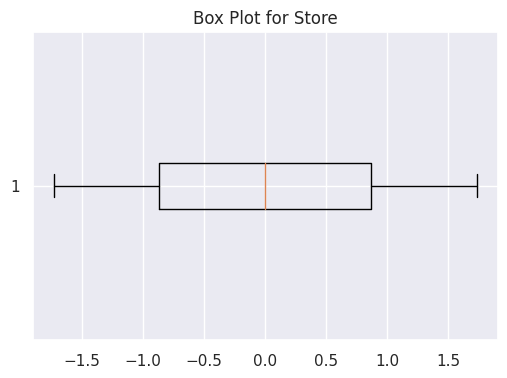

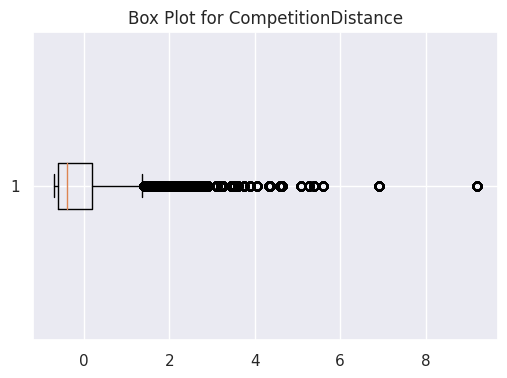

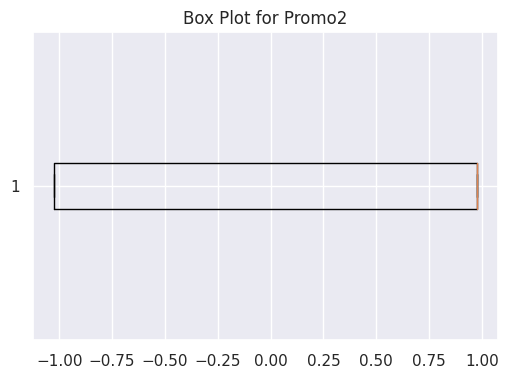

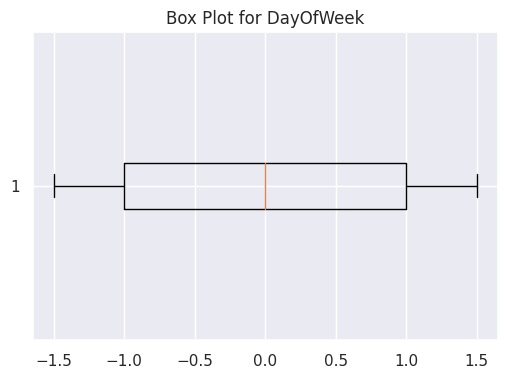

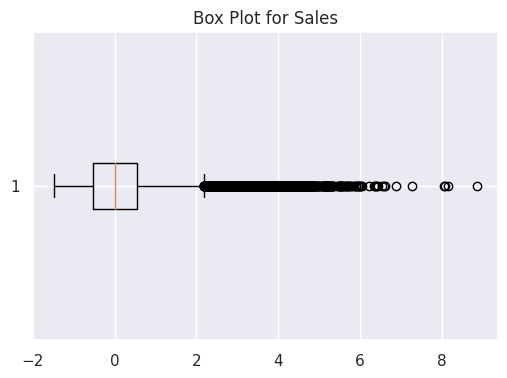

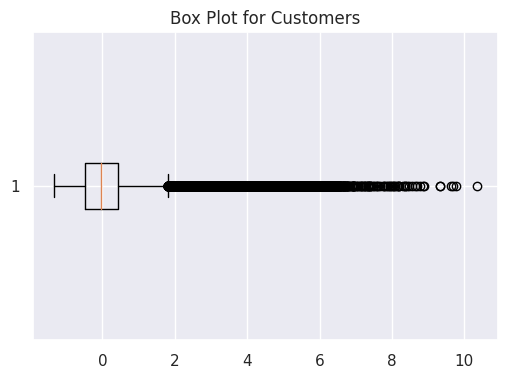

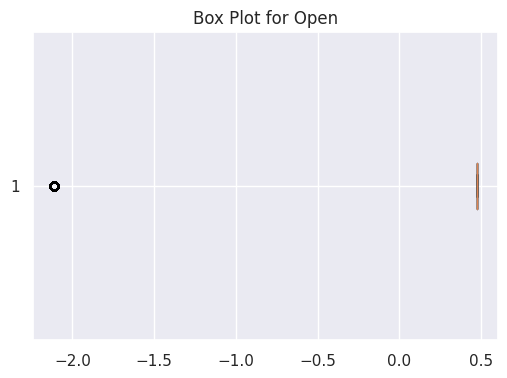

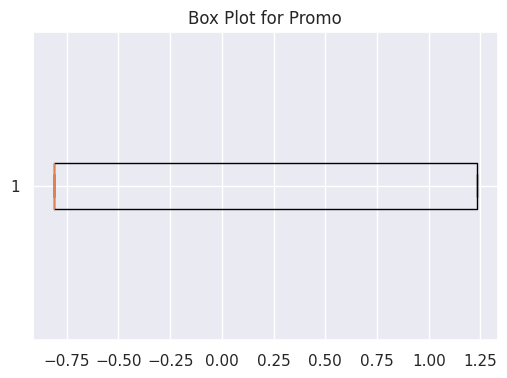

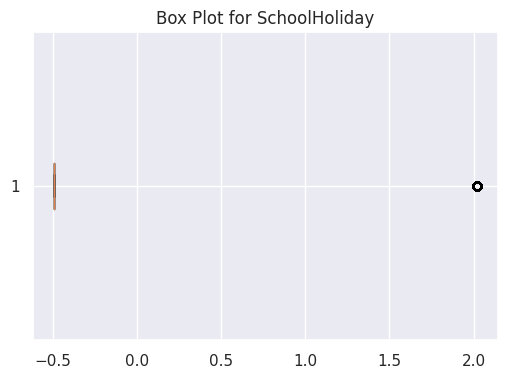

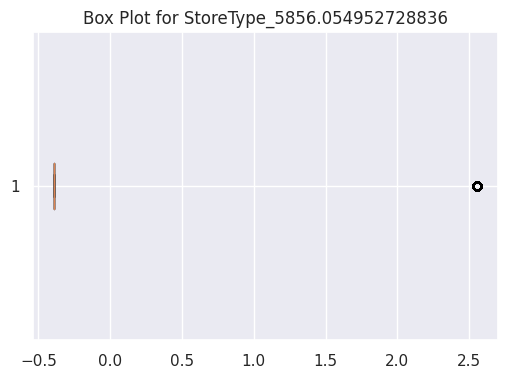

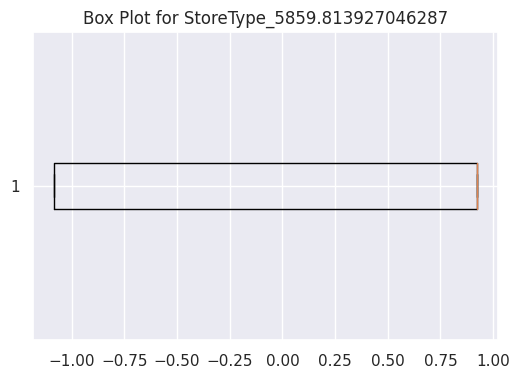

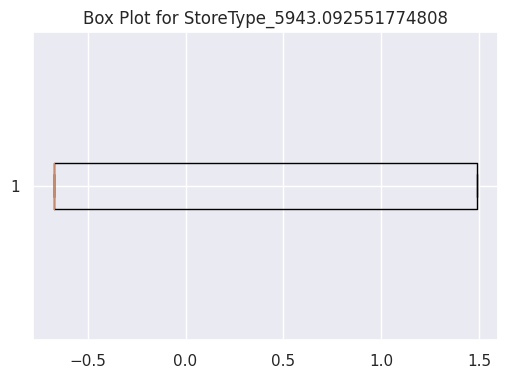

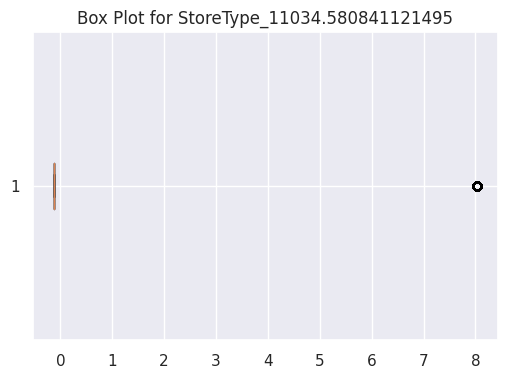

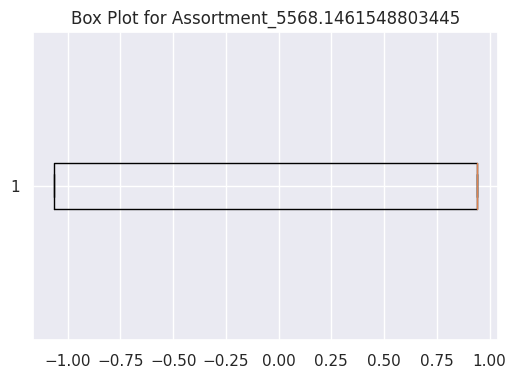

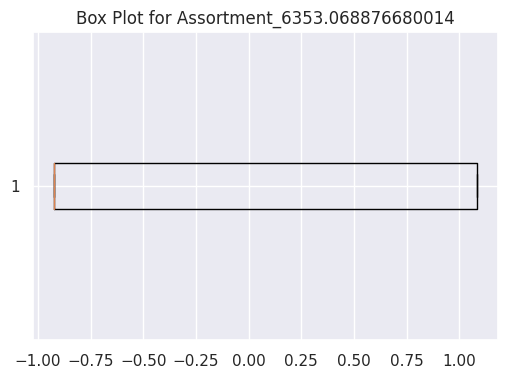

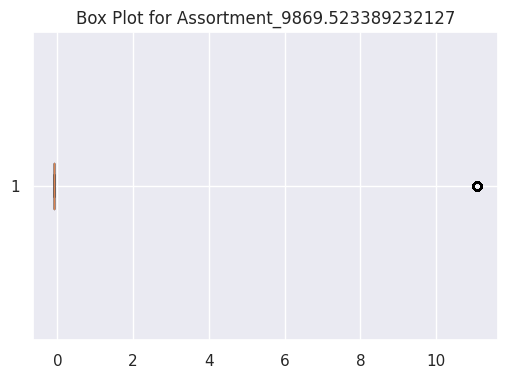

In [21]:
import matplotlib.pyplot as plt
# Create box plots for each numerical feature
for feature in num_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(train_store[feature], vert=False)
    plt.title(f'Box Plot for {feature}')
    plt.show()

In [22]:
import numpy as np

# Calculate the 25th and 75th percentiles for each numerical column
Q1 = np.percentile(train_store[num_cols], 25, axis=0)
Q3 = np.percentile(train_store[num_cols], 75, axis=0)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
is_outlier = (train_store[num_cols] < lower_bound) | (train_store[num_cols] > upper_bound)


In [23]:
is_outlier

,Store,CompetitionDistance,Promo2,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType_5856.054952728836,StoreType_5859.813927046287,StoreType_5943.092551774808,StoreType_11034.580841121495,Assortment_5568.1461548803445,Assortment_6353.068876680014,Assortment_9869.523389232127
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140321,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
140322,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
140323,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
140324,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


### **9. Check corelation of columns and show which were most relevant**
1. Corelation matrix and answer your findings

The visualizations shows the correlation between the columns

In [24]:
correlation_matrix = train_store.corr()
print(correlation_matrix)

                                  Store  CompetitionDistance    Promo2  \
Store                          1.000000            -0.027014  0.005831   
CompetitionDistance           -0.027014             1.000000 -0.145656   
Promo2                         0.005831            -0.145656  1.000000   
DayOfWeek                     -0.001743             0.000166 -0.000149   
Sales                          0.001413            -0.006278 -0.087412   
Customers                      0.020990            -0.087684 -0.153064   
Open                          -0.000091             0.013662 -0.009938   
Promo                          0.001413            -0.000135  0.000121   
SchoolHoliday                  0.005033            -0.012548 -0.008826   
StoreType_5856.054952728836    0.060956            -0.096217 -0.004462   
StoreType_5859.813927046287    0.005178            -0.039904 -0.069021   
StoreType_5943.092551774808   -0.050657             0.132258  0.091978   
StoreType_11034.580841121495   0.00141

<ipython-input-24-c063df3b3ff5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_store.corr()


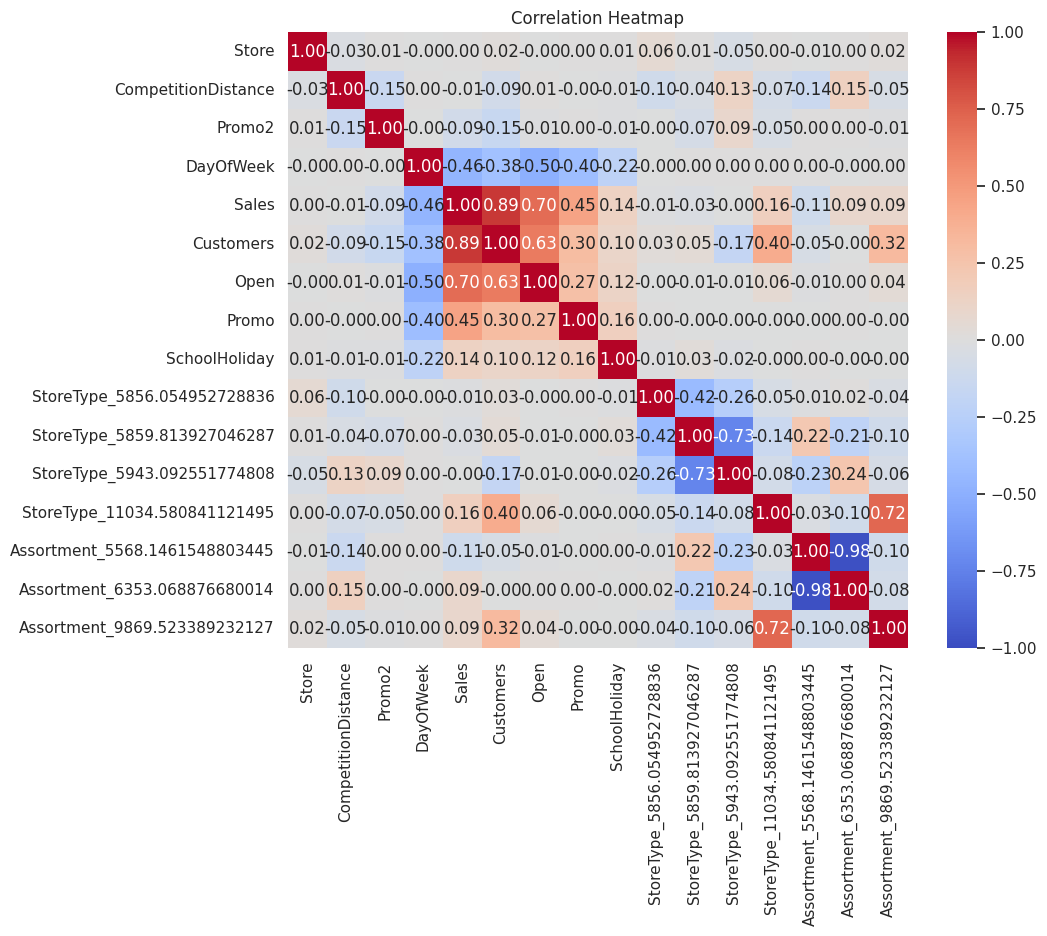

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

### **Rest of the Lab Questions**

How many unique stores are in the train_store dataframe, and what are their IDs?

In [33]:
unique_stores = train_store['Store'].unique()
num_stores = len(unique_stores)

print(f'There are {num_stores} unique stores in the train_store dataframe.')
print(f'Their IDs are: {unique_stores}')

There are 1112 unique stores in the train_store dataframe.
Their IDs are: [-1.72866004 -1.7255528  -1.72244557 ...  1.72658611  1.72969334
  1.73280058]


What is the average daily sales for each store in the train_store dataframe?

In [27]:
average_daily_sales = train_store.groupby('Store')['Sales'].mean()

# Print the average daily sales for each store
print(average_daily_sales)

Store
-1.728660   -0.565574
-1.725553   -0.447644
-1.722446   -0.031223
-1.719338    0.579372
-1.716231   -0.518877
               ...   
 1.720372   -0.485924
 1.723479    0.418391
 1.726586   -0.104277
 1.729693    3.202307
 1.732801   -0.009782
Name: Sales, Length: 1112, dtype: float64


How many days of data are included in the train_store dataframe, and what is the range of dates?

In [28]:
train_store['Date'] = pd.to_datetime(train_store['Date'])

# Calculate the number of unique days
num_unique_days = len(train_store['Date'].dt.date.unique())

# Find the range of dates
min_date = train_store['Date'].min().date()
max_date = train_store['Date'].max().date()

# Print the results
print(f"Number of Days of Data: {num_unique_days}")
print(f"Date Range: {min_date} to {max_date}")

Number of Days of Data: 126
Date Range: 2015-03-28 to 2015-07-31


What is the average sales per customer for each store in the train_store dataframe?

In [29]:
# Group the data by 'Store' and calculate the mean of 'Sales' and 'Customers' for each store
average_sales_per_customer = train_store.groupby('Store')[['Sales', 'Customers']].mean()

# Calculate the average sales per customer by dividing 'Sales' by 'Customers'
average_sales_per_customer['Average Sales per Customer'] = average_sales_per_customer['Sales'] / average_sales_per_customer['Customers']

# Print the average sales per customer for each store
print(average_sales_per_customer[['Average Sales per Customer']])


           Average Sales per Customer
Store                                
-1.728660                    1.301172
-1.725553                    1.480191
-1.722446                    0.485108
-1.719338                    0.590752
-1.716231                    1.279899
...                               ...
 1.720372                    0.766606
 1.723479                  -35.092694
 1.726586                    0.815523
 1.729693                    0.694367
 1.732801                    0.019504

[1112 rows x 1 columns]


How many days of the week does each store in the train_store dataframe open and close?

In [34]:
grouped_data = train_store.groupby('Store')
open_days_per_store = grouped_data['DayOfWeek'].apply(lambda x: x[x == 1].unique())
close_days_per_store = grouped_data['DayOfWeek'].apply(lambda x: x[x == 0].unique())

# Print the open and close days for each store
for store_id in open_days_per_store.index:
    print(f"Store {store_id}:")
    print(f"Open on Days: {open_days_per_store[store_id]}")
    print(f"Closed on Days: {close_days_per_store[store_id]}")
    print()

Store -1.728660039066513:
Open on Days: []
Closed on Days: []

Store -1.725552803324324:
Open on Days: []
Closed on Days: []

Store -1.722445567582135:
Open on Days: []
Closed on Days: []

Store -1.7193383318399462:
Open on Days: []
Closed on Days: []

Store -1.716231096097757:
Open on Days: []
Closed on Days: []

Store -1.713123860355568:
Open on Days: []
Closed on Days: []

Store -1.710016624613379:
Open on Days: []
Closed on Days: []

Store -1.7069093888711901:
Open on Days: []
Closed on Days: []

Store -1.7038021531290013:
Open on Days: []
Closed on Days: []

Store -1.7006949173868122:
Open on Days: []
Closed on Days: []

Store -1.6975876816446234:
Open on Days: []
Closed on Days: []

Store -1.6944804459024343:
Open on Days: []
Closed on Days: []

Store -1.6913732101602452:
Open on Days: []
Closed on Days: []

Store -1.6882659744180564:
Open on Days: []
Closed on Days: []

Store -1.6851587386758675:
Open on Days: []
Closed on Days: []

Store -1.6820515029336784:
Open on Days: []
Cl

What is the correlation between the Sales and Customers columns in the train_store dataframe?

In [31]:
correlation_sales_customers = train_store['Sales'].corr(train_store['Customers'])
print(f"Correlation between Sales and Customers: {correlation_sales_customers:.2f}")

Correlation between Sales and Customers: 0.89


## <CENTER><h1>CONGRATULATION YOU MADE IT! :D</h1></center>